In [1]:
import noise
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

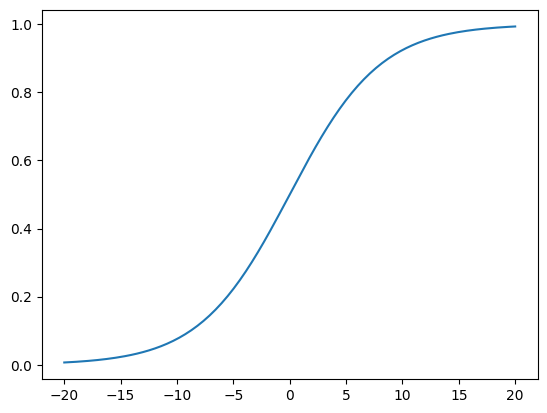

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-0.25*x))

xs = []
ys = []

steps = np.linspace(-20,20,150)

for i in steps:
    xs.append(i)
    ys.append(sigmoid(i))

plt.plot(xs,ys)

In [ ]:
import random
import numpy as np
n = 40000

for i in range(100):
    shape = (int(np.sqrt(n)),int(np.sqrt(n)))
    scale = 77.0
    octaves = 60
    persistence = 0.2
    lacunarity = 2
    base = random.randint(10,200)
    print(base)

    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2(i/scale, 
                                        j/scale, 
                                        octaves=octaves, 
                                        persistence=persistence, 
                                        lacunarity=lacunarity, 
                                        repeatx=1024, 
                                        repeaty=1024, 
                                        base=127) # 42 good, 12 linear, # 33 good

    world = np.around(np.interp(world, (world.min(), world.max()), (0,20)),0)
    world = np.flip(world.T,0)

    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-0.5*x))

    # for i in range(len(world)):
    #     for j in range(len(world)):
    #         if world[i][j] > 20:
    #             world[i][j] = world[i][j] - world[i][j] * sigmoid(world[i][j]- 20)
    #         elif world[i][j] < 10:
    #             world[i][j] = 0
    #         else:
    #             world[i][j] = world[i][j]

    sns.heatmap(world,cmap='terrain')
    plt.show()
# print(np.around(world))